In [221]:
from collections import Counter
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/anwasty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anwasty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [222]:
examplar = wn.synset('search.v.01') 

lemmas_lang = {}
for lemma in examplar.lemmas():
    for lang in wn.langs(): 
        lang_lemmas = examplar.lemma_names(lang)
        if lang_lemmas:
            lemmas_lang[lang] = lang_lemmas

for i in lemmas_lang.items():
    print(i)

('eng', ['search', 'seek', 'look_for'])
('als', ['gjurmim', 'kërkim', 'kërkoj'])
('arb', ['استشار', 'استكشف', 'اكتشف', 'بحث', 'بحث_في', 'تقصى', 'حاول', 'حاول_إيجاد', 'سبر', 'سعى_لعمل_شئ', 'طلب', 'طمح_في', 'فتش', 'فحص', 'قصد'])
('bul', ['търся'])
('cmn', ['寻找', '寻觅', '找', '找寻', '搜寻', '搜查', '搜索'])
('dan', ['lede', 'søge'])
('ell', ['ψάχνω'])
('fin', ['etsiä'])
('fra', ['chercher', 'rechercher'])
('heb', ['חִפֵּשׂ'])
('hrv', ['potražiti', 'pretražiti', 'pretraživati', 'tragati', 'tražiti'])
('isl', ['leita_að', 'leita_eftir'])
('ita', ['cercare'])
('jpn', ['さがし回る', '尋ねる', '捜しもとめる', '捜し求める', '捜す', '捜索+する', '探しまわる', '探しもとめる', '探し回る', '探し求める', '探す', '探る'])
('cat', ['buscar', 'cercar', 'escorcollar'])
('eus', ['arakatu', 'erregistratu', 'miatu'])
('glg', ['buscar', 'explorar', 'rexistrar'])
('spa', ['buscar', 'explorar', 'registrar'])
('ind', ['cari', 'geledah', 'memeriksa', 'mencari', 'mengacar', 'mengemong', 'menggeledah', 'menyeluk', 'meraba-raba', 'merisik', 'merosok', 'merunjang'])
('zsm

In [223]:
lemma_synsets = {}

for lang, lemmas in lemmas_lang.items():
    for lemma in lemmas:
        synsets = wn.lemmas(lemma, lang=lang)
        for synset in synsets:
            synset_name = synset.synset().name() 
            
            if synset_name not in lemma_synsets:
                lemma_synsets[synset_name] = set()  
            
            lemma_synsets[synset_name].add(lemma) #множества, чтобы учитывать только уникальные леммы
            
filtered_synsets = {}

for synset, lemmas in lemma_synsets.items():
    lemma_synsets[synset] = list(lemmas)
    
for i, c in lemma_synsets.items():    
    if len(c) > 3:
        filtered_synsets[i] = c
        
for synset in filtered_synsets.keys():
    print(synset)

print(len(filtered_synsets.keys()))

search.n.01
search.n.02
search.n.05
search.v.01
search.v.02
research.v.02
search.v.04
seek.v.01
try.v.01
seek.v.04
seek.v.05
anticipate.v.05
dredge.v.02
investigate.v.02
comb.v.02
invite.v.01
learn.v.04
analyze.v.01
probe.v.01
investigate.v.01
examine.v.02
size_up.v.01
inspect.v.01
quest.v.02
quest.v.01
scout.v.01
cast_about.v.01
quest_for.v.01
want.v.03
grope.v.01
scan.v.02
31


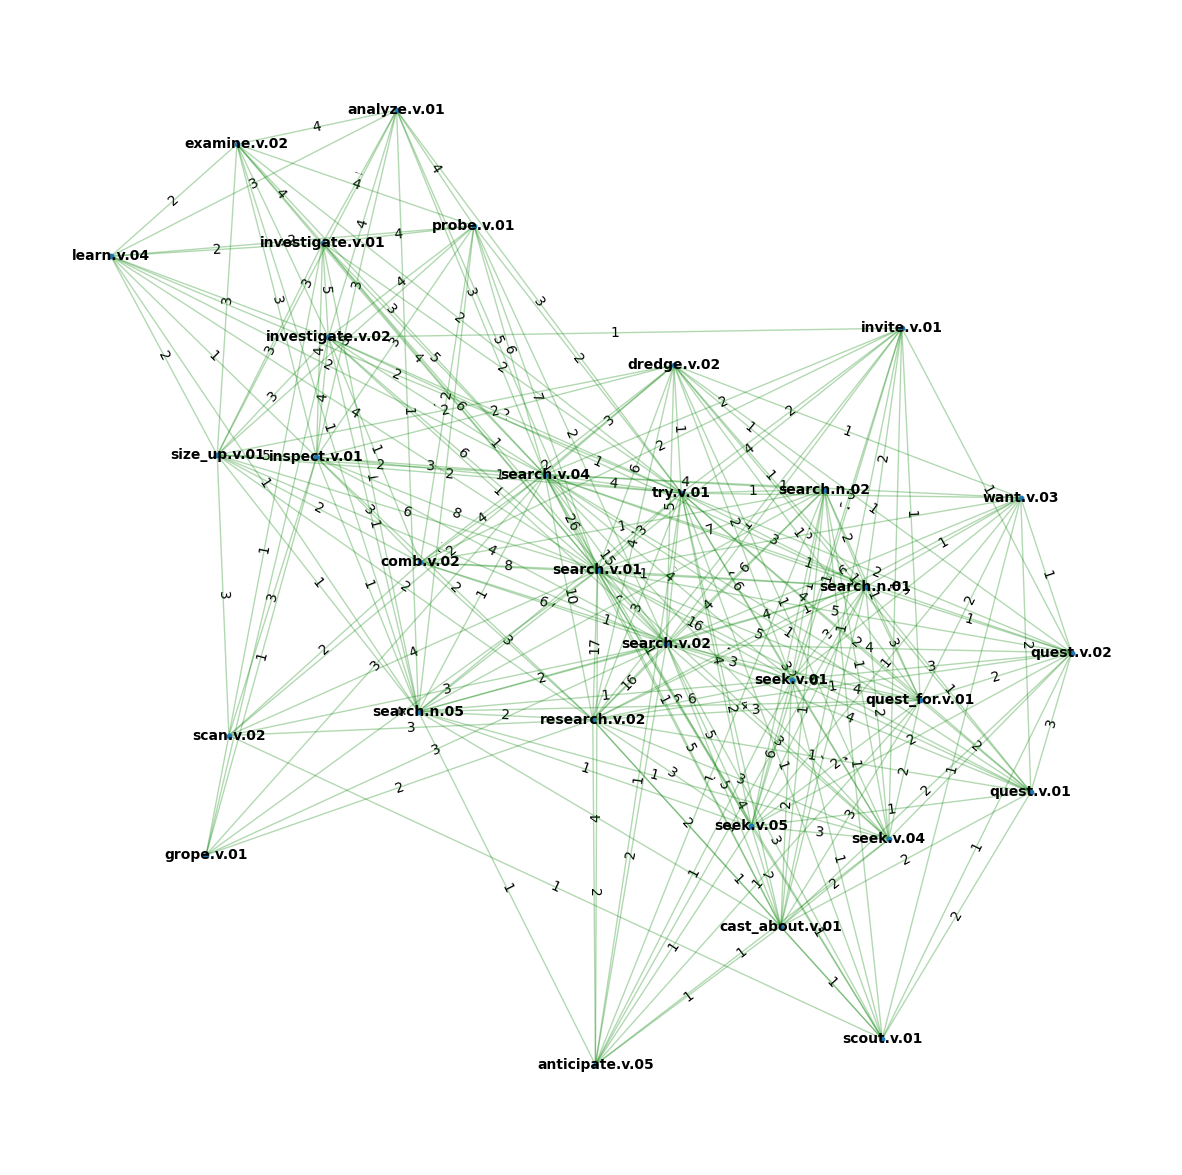

In [224]:
DECEIT = nx.Graph()
synsets = list(filtered_synsets.keys())
for i in range(len(synsets)):
    for j in range(i + 1, len(synsets)):
        synset1 = synsets[i]
        synset2 = synsets[j]

        #находим общие леммы
        common_lemmas = set(lemma_synsets[synset1]).intersection(set(lemma_synsets[synset2]))
        weight = len(common_lemmas)

        if weight > 0:
            DECEIT.add_weighted_edges_from([(synset1, synset2, weight)])
pos=nx.spring_layout(DECEIT)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(DECEIT, pos, node_size=10) 
labels = nx.get_edge_attributes(DECEIT,'weight')
nx.draw_networkx_edge_labels(DECEIT, pos, edge_labels=labels)
nx.draw_networkx_edges(DECEIT, pos, alpha=0.3, edge_color='green')
nx.draw_networkx_labels(DECEIT, pos, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

In [225]:
# Связные компоненты
components = list(nx.connected_components(DECEIT))
num_components = len(components)
print(num_connected_components)
# Все узлы связаны между собой

1


In [226]:
print(nx.density(DECEIT))
# В графе много связей

0.5548387096774193


Degree centrality подсчитывает количество рёбер, которые соединяют этот узел с другими. Чем больше связей, тем выше узел находится в списке.

In [227]:
deg = nx.degree_centrality(DECEIT)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

search.v.01
search.v.02
search.v.04
try.v.01
research.v.02
search.n.05
search.n.01
seek.v.01
seek.v.05
quest_for.v.01
dredge.v.02
cast_about.v.01
inspect.v.01
search.n.02
seek.v.04
investigate.v.02
quest.v.02
size_up.v.01
comb.v.02
invite.v.01
quest.v.01
want.v.03
probe.v.01
investigate.v.01
anticipate.v.05
scout.v.01
learn.v.04
analyze.v.01
examine.v.02
scan.v.02
grope.v.01


Eigenvector Centrality учитывает не только количество связей данного узла с другими узлами, но и качество этих узлов
То есть выше будут находиться наиболее центральные узлы, которые связаны с другими центральными узлами.

In [231]:
deg2 = nx.eigenvector_centrality(DECEIT)
for nodeid in sorted(deg2, key=deg2.get, reverse=True):
    print(nodeid)

search.v.01
try.v.01
search.v.02
search.v.04
research.v.02
search.n.01
seek.v.01
search.n.05
quest_for.v.01
seek.v.05
cast_about.v.01
seek.v.04
dredge.v.02
search.n.02
quest.v.02
invite.v.01
quest.v.01
inspect.v.01
size_up.v.01
want.v.03
investigate.v.02
comb.v.02
anticipate.v.05
scout.v.01
probe.v.01
investigate.v.01
learn.v.04
analyze.v.01
examine.v.02
scan.v.02
grope.v.01


In [232]:
# Применяем алгоритм Girvan-Newman

communities_generator = community.girvan_newman(DECEIT) 
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['analyze.v.01', 'anticipate.v.05', 'cast_about.v.01', 'comb.v.02', 'dredge.v.02', 'examine.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'invite.v.01', 'learn.v.04', 'probe.v.01', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'scout.v.01', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.04', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['grope.v.01']]
next level communities: [['analyze.v.01', 'anticipate.v.05', 'cast_about.v.01', 'comb.v.02', 'dredge.v.02', 'examine.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'invite.v.01', 'learn.v.04', 'probe.v.01', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'research.v.02', 'scout.v.01', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.04', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['grope.v.01'], ['scan.v.02']]

In [233]:
communities_generator_2 = community.greedy_modularity_communities(DECEIT) 
communities_generator_2

[frozenset({'anticipate.v.05',
            'cast_about.v.01',
            'comb.v.02',
            'dredge.v.02',
            'invite.v.01',
            'quest.v.01',
            'quest.v.02',
            'quest_for.v.01',
            'research.v.02',
            'scan.v.02',
            'scout.v.01',
            'search.n.01',
            'search.n.02',
            'search.v.02',
            'seek.v.01',
            'seek.v.04',
            'seek.v.05',
            'want.v.03'}),
 frozenset({'analyze.v.01',
            'examine.v.02',
            'grope.v.01',
            'inspect.v.01',
            'investigate.v.01',
            'investigate.v.02',
            'learn.v.04',
            'probe.v.01',
            'search.n.05',
            'search.v.01',
            'search.v.04',
            'size_up.v.01',
            'try.v.01'})]

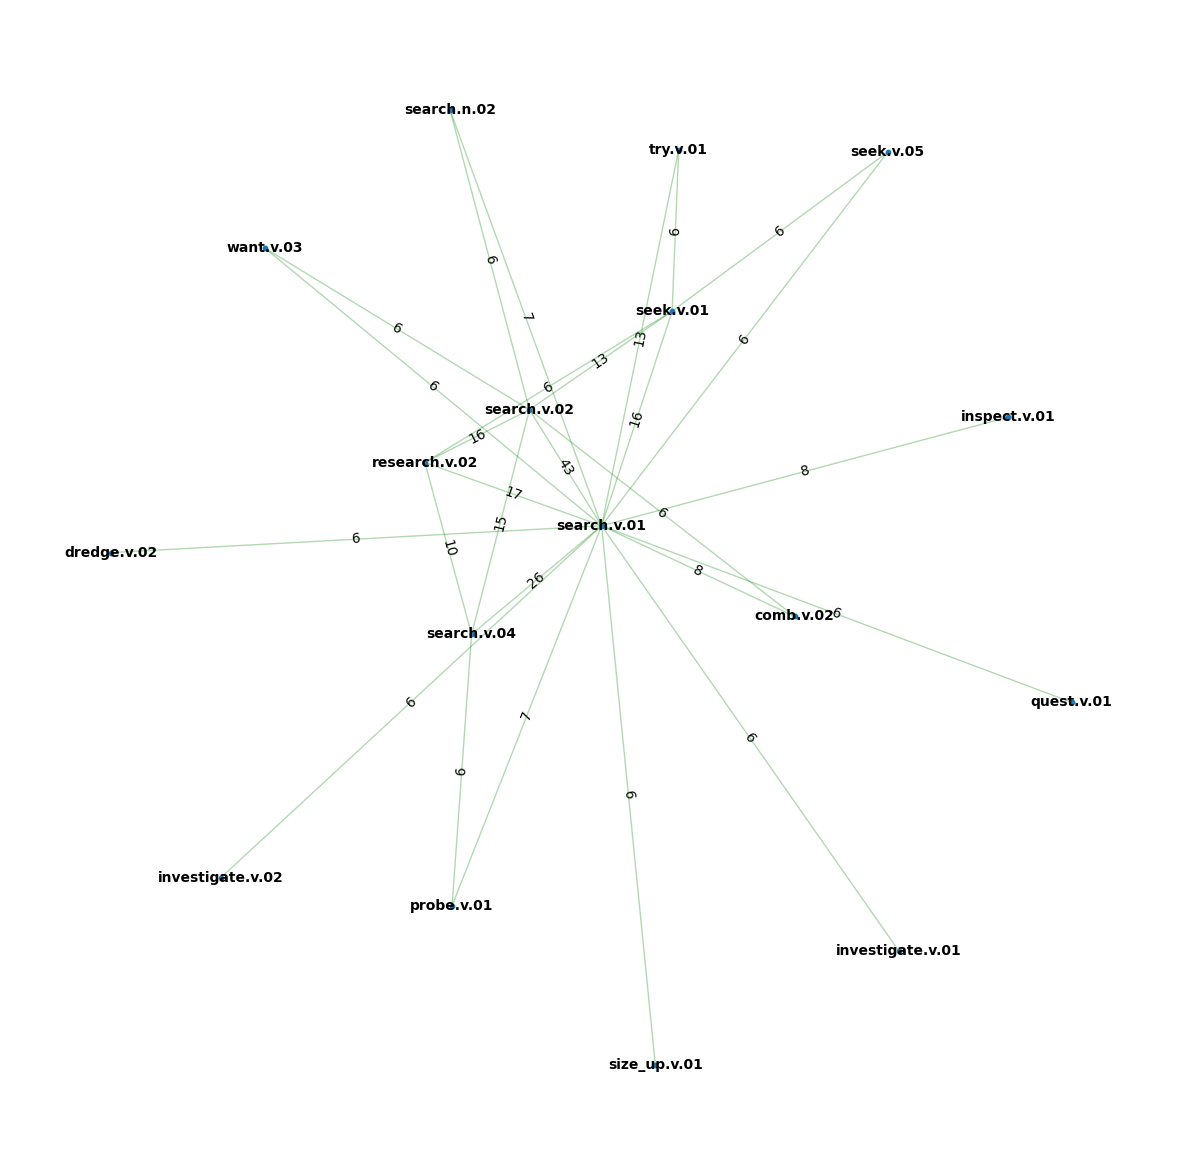

In [234]:
G = nx.Graph()
synsets = list(filtered_synsets.keys())
for i in range(len(synsets)):
    for j in range(i + 1, len(synsets)):
        synset1 = synsets[i]
        synset2 = synsets[j]

        #находим общие леммы
        common_lemmas = set(lemma_synsets[synset1]).intersection(set(lemma_synsets[synset2]))
        weight = len(common_lemmas)

        if weight > 5:
            G.add_weighted_edges_from([(synset1, synset2, weight)])
pos=nx.spring_layout(G)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(G, pos, node_size=10) 
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='green')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

In [235]:
# Связные компоненты
components = list(nx.connected_components(G))
num_components = len(components)
print(num_connected_components)

1


In [236]:
print(nx.density(G))

0.19852941176470587


In [237]:
degr = nx.degree_centrality(G)
for nodeid in sorted(degr, key=degr.get, reverse=True):
    print(nodeid)

search.v.01
search.v.02
seek.v.01
research.v.02
search.v.04
search.n.02
try.v.01
seek.v.05
comb.v.02
probe.v.01
want.v.03
dredge.v.02
investigate.v.02
investigate.v.01
size_up.v.01
inspect.v.01
quest.v.01


In [238]:
degr2 = nx.eigenvector_centrality(G)
for nodeid in sorted(degr2, key=degr2.get, reverse=True):
    print(nodeid)

search.v.01
search.v.02
seek.v.01
research.v.02
search.v.04
search.n.02
comb.v.02
want.v.03
try.v.01
seek.v.05
probe.v.01
dredge.v.02
investigate.v.02
investigate.v.01
size_up.v.01
inspect.v.01
quest.v.01


In [239]:
# Применяем алгоритм Girvan-Newman

communities_generator = community.girvan_newman(G) 
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['comb.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'probe.v.01', 'quest.v.01', 'research.v.02', 'search.n.02', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['dredge.v.02']]
next level communities: [['comb.v.02', 'inspect.v.01', 'investigate.v.01', 'probe.v.01', 'quest.v.01', 'research.v.02', 'search.n.02', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['dredge.v.02'], ['investigate.v.02']]


In [240]:
communities_generator_2 = community.greedy_modularity_communities(G) 
communities_generator_2

[frozenset({'dredge.v.02',
            'inspect.v.01',
            'investigate.v.01',
            'investigate.v.02',
            'quest.v.01',
            'search.v.01',
            'size_up.v.01'}),
 frozenset({'comb.v.02', 'search.n.02', 'search.v.02', 'want.v.03'}),
 frozenset({'probe.v.01', 'research.v.02', 'search.v.04'}),
 frozenset({'seek.v.01', 'seek.v.05', 'try.v.01'})]